# The Numpy Random Package

This notebook will discuss and dempnstrate the Numpy Random package.  This is submission for the Programming for Data Analysis module in GMIT.  

The Numpy documentation can be found [here](https://numpy.org/doc/stable/reference/random/index.html)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

## NumPy
Numerical Python or "Numpy" is a package in Python that is used for data manipulation on numerical data. Numpy preforms fast operations on arrays. (MAYBE PUT SOME EXAMPLES IN HERE OF WHAT IT DOES EG SORTING). Numpy is much more effecient at preforming numerical data manipulation on its arrays than python is on lists. As Numpy is deisgned specifically for numerical data manipulation, it uses pre-compiled code rather than longer/ less efficient general phython code i.e. looping, indexing, etc..  (MAYBE DO A DEMO on efficiency?)  [1]

## NumPy Random
Numpy Random is a subpackage of numpy.  The main purpose of the random package is for creating simulation data that generated randomly depending on the function that is chosen.  3 categories of functions: simple random data, permutations, and distributions.  

Discuss pseudorandom number generator (PRNG) - how random is random, not truely random. Seeds to be discussed later.

<br>

# Simple Random Data
## Random Integers
The integers function provides a random number(s) between the parameters the user provides.  The parameters  include low, high (exclusive) and size of the sample of random numbers (optional but default size is 1).  First we'll generate one random number to simulate a dice roll.

In [2]:
rng = np.random.default_rng()
rng.integers(1, 7)

2

<br>

### Array of Random Integers
We can also generate an array of randoms. Below we will generate lotto quick pick numbers. 

In [3]:
rng = np.random.default_rng()
rng.integers(1, 48, size= 6)  # high is exclusive so numbers are generated between 1 - 47. 

array([ 4, 33, 47, 42, 11, 20], dtype=int64)

<br>

If we wish generate our quickpick numbers for lotto,  lotto plus 1 and lotto plus 2, we can create 3 arrays each containing 6 numbers. 

In [4]:
rng.integers(1, 48, size= (3,6))

array([[ 7,  6, 28, 24, 38,  3],
       [47, 20, 10, 44, 21,  8],
       [35, 24, 12, 25, 24, 47]], dtype=int64)

<br>

### Progressive/ Regressive Random Arrays
We can set lower or higher limits for numbers in the array as the random generation proceeds. As the range between the low and high narrows, we get a gradual increase or decrease in the frequency of the random number. To do so we set the lower or higher limit bounds by an array as the parameter.[2] 

Below is an example of setting the lower bounds for an array of 10,000 numbers. This is done by iterating through the size of the random array. The low parameter will increase slightly after each random number is generated, narrowing the random number choice available. This ultimately leads to the array being top heavy.  We can see this illustrated on the below histogram.

In [5]:
low = []
high = 10001 # High is exclusive for array and range. 10,000 is the true size. 


for i in range(1, high):
    lower_limit = i * 0.99
    low.append(lower_limit)

progressive_10k = rng.integers([low], high, size=high-1) #size is high-1 because high is exclusive.

(array([  64.,  183.,  292.,  444.,  605.,  829., 1010., 1434., 1895.,
        3244.]),
 array([  129. ,  1116.1,  2103.2,  3090.3,  4077.4,  5064.5,  6051.6,
         7038.7,  8025.8,  9012.9, 10000. ]),
 <BarContainer object of 10 artists>)

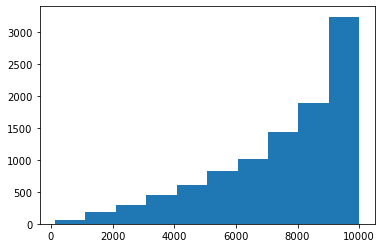

In [6]:
plt.hist(progressive_10k)

<br>

## Random Floats

The Random function in Numpy will provide floating point random numbers between 0 and 1(exclusive). As with random integers, random numbers are generated with a uniform distribion across the range.  Although parameters within the random function are limited. 

In [7]:
rand_flt = rng.random(10000)

(array([ 971., 1014.,  997.,  962., 1051., 1012., 1029.,  974.,  989.,
        1001.]),
 array([2.02250371e-04, 1.00180318e-01, 2.00158385e-01, 3.00136452e-01,
        4.00114519e-01, 5.00092586e-01, 6.00070653e-01, 7.00048721e-01,
        8.00026788e-01, 9.00004855e-01, 9.99982922e-01]),
 <BarContainer object of 10 artists>)

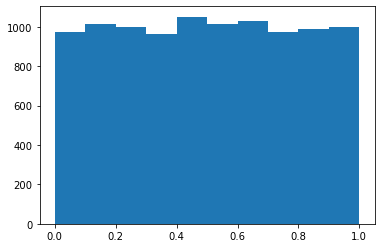

In [8]:
plt.hist(rand_flt)

<br>

## Choice

Random choice allows us to pick a random item(s) from an array or number(s) from a range.  We have the option to have that item returned to the pool to be potientally reselected for subsequent choices or not. Additionality we can set the probability of an item being selected. It's also worth noting that an array can contain a variety of data types, i.e ints, floats, strings, booleans, lists, etc.. [5][6]

Below I will demostrate a raffle where one contestant wins.  Although lets say we favour 11 and 32 over each other contestant.  Lets set their probilitity of winning higher than the rest and run the raffle 100 times.  I will then plot the frequency of each winner. 

In [37]:
player_profile = {} # [4] creating a dict to assign probabilities to specific contestants. 
players_no = []
probability =np.array([]) #[7]
winners = []
count = 0

while count < 100:  # running the function/ raffle 100 times. 
    for i in np.arange(100): # looping through players, setting probability.
        if i == 11:
            player_profile[i] = 0.25  # contestant 11 has 25% probability of being selected. 

        elif i == 32:
            player_profile[i] = 0.25   # contestant 32 has 25% probability of being selected.

        else: 
            player_profile[i] = 0.00757 # all other contestant each have 0.757% of being selected. 


    for keys in player_profile.keys(): # [8] iterating through the dict for players
        players_no.append(keys)  # appending the players to an array to be added to choice function. 


    for values in player_profile.values():  # need to create a numpy array before appending 
        probability = np.append(probability, values)  # as we'll need to sum these below. 


    probability /= probability.sum() #[3] - Need to sum and divide by itself as probability would not add to 1. 


    winner = rng.choice(players_no, p = probability) # choice between players with probabilities set. 
    winners.append(winner)
    count +=1


(array([ 1.,  0.,  0.,  1.,  0., 21.,  0.,  2.,  0.,  0.,  1.,  1.,  0.,
         1.,  1.,  0.,  2.,  0.,  0.,  1.,  0.,  2.,  1.,  0.,  0.,  0.,
         1.,  3., 21.,  0.,  0.,  1.,  2.,  0.,  3.,  1.,  1.,  0.,  0.,
         1.,  0.,  2.,  1.,  1.,  0.,  0.,  2.,  0.,  0.,  0.,  1.,  0.,
         0.,  1.,  2.,  0.,  0.,  1.,  0.,  2.,  0.,  0.,  0.,  0.,  2.,
         1.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,  2.,  0.,  1.,  0.,  0.,
         0.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.]),
 array([ 6.  ,  6.92,  7.84,  8.76,  9.68, 10.6 , 11.52, 12.44, 13.36,
        14.28, 15.2 , 16.12, 17.04, 17.96, 18.88, 19.8 , 20.72, 21.64,
        22.56, 23.48, 24.4 , 25.32, 26.24, 27.16, 28.08, 29.  , 29.92,
        30.84, 31.76, 32.68, 33.6 , 34.52, 35.44, 36.36, 37.28, 38.2 ,
        39.12, 40.04, 40.96, 41.88, 42.8 , 43.72, 44.64, 45.56, 46.48,
        47.4 , 48.32, 49.24, 50.16, 51.08, 52.  , 52.92, 53.84, 54.76,
        

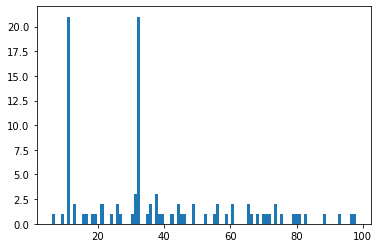

In [38]:
plt.hist(winners, bins=100) # Plotting the results of the 100 raffles.  # Need to do a better plot. 

<br>

# Permutations
## Shuffle & Permute

Shuffling mixes the contents of a range, array or another mutable sequence.  We can shuffle a list and output the results in an array or in multi dimensional arrays.  This will shuffle the contents of the original data. 

Permute is similar however the original data is not suffled. Rather a copy of the original data is made which is shuffled. [9]

Below we will create two 5-aside soccer teams.  Individuals are picked at random from a selection of 10 and placed into 2 seperate teams.

In [95]:
players = np.arange(10) # Creating a numpy array with numbers ranging from 0 to 9. 
rng.shuffle(players) # Shuffling the players up. 

teams = players.reshape((2, 5)) # Placing the random numbers into 2 arrays each containing 5 numbers.
rng.shuffle(teams) # Shuffling the order of the arrays.  Team A will kick off.  

Team_A = teams[0]
Team_B = teams[1]
print("Team A contains players: {}. You will kick off.".format(Team_A))
print("Team B contains players: {}".format(Team_B))



Team A contains players: [3 5 8 2 7]. You will kick off.
Team B contains players: [4 9 1 6 0]


<br>

# Distributions
## Normal

# References 
- [1] https://numpy.org/doc/stable/user/whatisnumpy.html
- [2] https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.integers.html#numpy.random.Generator.integers
- [3] https://newbedev.com/np-random-choice-probabilities-do-not-sum-to-1
- [4] https://stackoverflow.com/questions/3679694/a-weighted-version-of-random-choice
- [5] https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html#numpy.random.Generator.choice
- [6] https://www.sharpsightlabs.com/blog/numpy-random-choice/#numpy-random-choice-syntax
- [7] https://numpy.org/doc/stable/user/basics.creation.html
- [8] https://realpython.com/iterate-through-dictionary-python/#iterating-through-values
- [9] https://newbedev.com/shuffle-vs-permute-numpy

